In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [2]:
column = ['carid','tradetime','brand','serial','model','mileage','color','cityid','carcode','transfercount','seatings','registerdate','licensedate','country','maketype','modelyear','displacement','gearbox','oiltype','newprice','anony1','anony2','anony3','anony4','anony5','anony6','anony7','anony8','anony9','anony10','anony11','anony12','anony13','anony14','anony15','price']
df =  pd.read_table("2021年MathorCup大数据竞赛赛道A/附件/附件1：估价训练数据.txt",header=None,names=column,index_col=False)
# df = pd.read_table("2021年MathorCup大数据竞赛赛道A/附件/所有数据.txt",header=None,names=column,index_col=False)

In [3]:
df

,carid,tradetime,brand,serial,model,mileage,color,cityid,carcode,transfercount,...,anony7,anony8,anony9,anony10,anony11,anony12,anony13,anony14,anony15,price
0,1,2021/6/28,1,1,1,4.01,1,1,1.0,0,...,NaN,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,NaN,4.24
1,2,2021/6/25,2,2,2,8.60,1,2,1.0,0,...,NaN,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38
2,5,2021/6/19,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,NaN,4515*1725*1445,NaN,2,NaN,1.00
3,6,2021/6/29,6,6,6,6.04,1,3,1.0,3,...,2018/8/18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38
4,7,2021/6/30,7,7,7,5.70,4,1,2.0,2,...,2020/9/20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021/5/26,34,588,4169,10.38,5,35,3.0,0,...,NaN,1.0,5.0,2.0,1,4295*1705*1570,NaN,1,NaN,0.88
29996,4294,2020/6/3,12,92,1797,11.69,2,1,2.0,2,...,2019/9/23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,NaN,8.30
29997,20584,2020/9/27,7,113,501,9.87,6,1,2.0,0,...,NaN,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,NaN,5.00
29998,11490,2020/11/9,45,131,3024,9.57,1,1,1.0,1,...,2020/7/9,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,NaN,28.00


In [4]:
print(df.shape)

(30000, 36)


# anony11数据转化和清洗

In [5]:
# 包含元素： 1   1+2   3+2   5   1,3+2   1+2,4+2  nan  共6类
df['anony11']

0          1
1        1+2
2        NaN
3          1
4          1
        ... 
29995      1
29996    1+2
29997      1
29998    3+2
29999    1+2
Name: anony11, Length: 30000, dtype: object

In [6]:
# 转化为类别 0-3 四分类 删除掉两类
def idontknow(cls):
    if pd.isna(cls):
        return cls
    elif cls == '1':
        return int(0)
    elif cls == '1+2':
        return int(1)
    elif cls == '3+2':
        return int(2)
    elif cls == '5':
        return int(4) # 无该元素
    elif cls == '1,3+2':
        return int(5) # 无该元素
    elif cls == '1+2,4+2':
        return int(3)

In [7]:
df['anony11'] = df['anony11'].apply(idontknow)

In [8]:
# # 由图可知，该分类结果的4和5类仅有一个数据 删除这两类 最后删
# df.iloc[19774]
# df.iloc[24837]
# #删除这两行
# df = df.drop([19774,24837])

# 日期转换：将所有时间信息距离2000年1月1日的天数差。

In [9]:
def date2num(day):
    '''
    xxxx-xx-xx (y-m-d)/ xxxxxx(y m) to  num
    判断是否为nan，若不为nan则判断为xxxx-xx-xx的年月日形式或xxxxxx的月+日形式，计算距离2000年1月1日的日期差，若日期小于2000年本函数不适用
    （数据集中的日期全为2000年后）
    '''
    if pd.isna(day):
        return day
    else:
        day = str(day)
        if day[4] == '-':
            year = int((eval(day[:4])-2000))
            if day[5] == '0':
                month = int(eval(day[6:7]))
            if day[5] == '1':
                month = int(eval(day[5:7]))
            if day[8] == '0':
                days = int(eval(day[-1:]))
            else:
                days = int(eval(day[-2:]))
            return int(year*365 + (month-1)*30 + days)
        elif len(day)==8:
            year = int((eval(day[:4])-2000))
            if day[4] == '0':
                month = int(eval(day[5:6]))
            else:
                month = int(eval(day[4:6]))
            return int(year*365 + (month-1)*30)
        else:
            return 'error'

In [10]:
# tradetime registerdate licensedate anony7 anony13（xxxxxx） anony15为日期
df['tradetime'] = df['tradetime'].apply(date2num)
df['registerdate'] = df['registerdate'].apply(date2num)
df['licensedate'] = df['licensedate'].apply(date2num)
df['anony7'] = df['anony7'].apply(date2num)
df['anony13'] = df['anony13'].apply(date2num)
df['anony15'] = df['anony15'].apply(date2num)

SyntaxError: invalid syntax (<string>, line 1)

# country数据转化（之后转one-hot）

In [11]:
# 0 779411-779421 无779420 共11类 将该11类转化为0-10数字
def country2country(country):
    if pd.isna(country):
        return country
    elif int(country) == 0:
        return 0
    else:
        count = str(country)
        count = count[4:6]
        if int(count[0]) == 1:
            return int(count[1])
        else:
            return 10

In [12]:
df['country'] = df['country'].apply(country2country)

In [13]:
df['country']

0        3.0
1        5.0
2        NaN
3        3.0
4        5.0
        ... 
29995    3.0
29996    5.0
29997    5.0
29998    5.0
29999    NaN
Name: country, Length: 30000, dtype: float64

# anony12数据转化：计算车的尺寸乘积

In [14]:
# anony12数据为xxxx*xxxx*xxxx 判断为车身尺寸，将xxxx*xxxx*xxxx（mm）计算为 V（m^3）
def size2v(size):
    size = str(size)
    if len(size)==14:
        x = eval(size[:4])
        y = eval(size[5:9])
        z = eval(size[10:14])
#         print(x,y,z)
        return x*y*z/1000000000
    else:
        return 'error'

In [15]:
df['anony12'] = df['anony12'].apply(size2v)

In [16]:
df['anony12']

0        11.932050
1        12.163010
2        11.254202
3        14.087871
4        12.355994
           ...    
29995    11.497071
29996    13.543776
29997    11.975055
29998    12.970685
29999    12.918420
Name: anony12, Length: 30000, dtype: float64

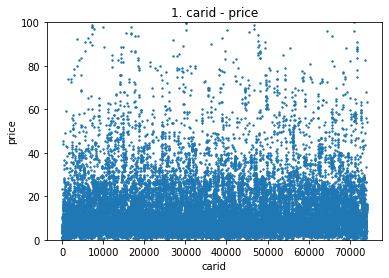

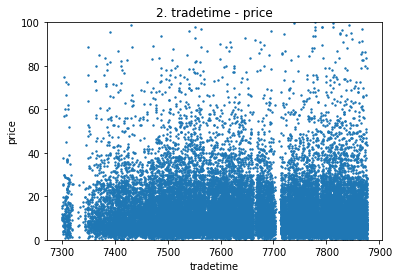

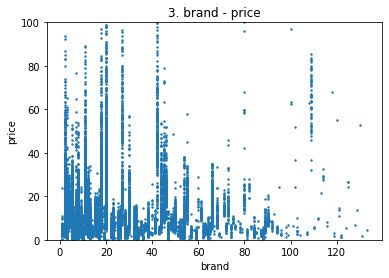

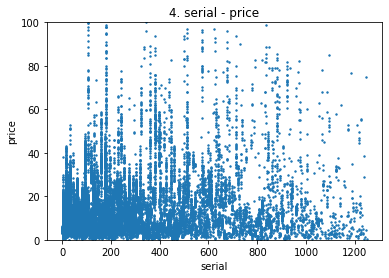

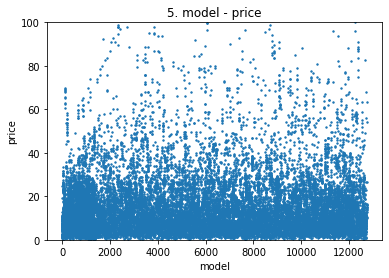

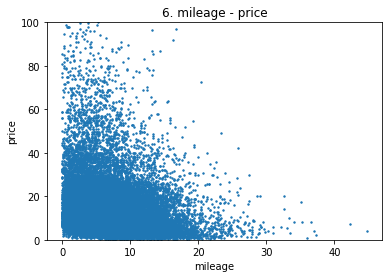

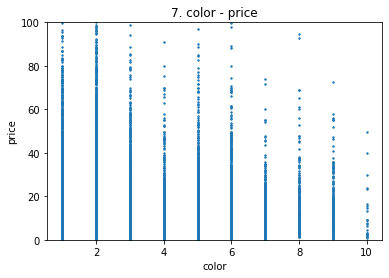

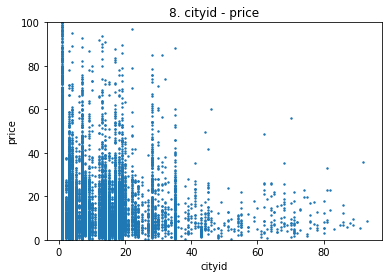

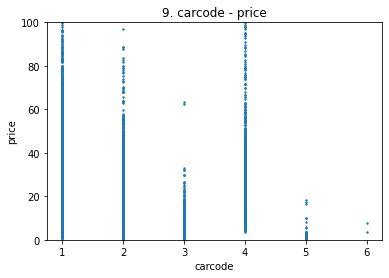

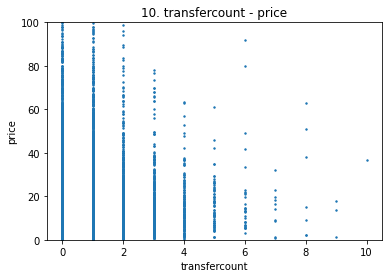

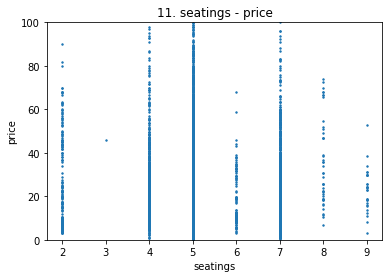

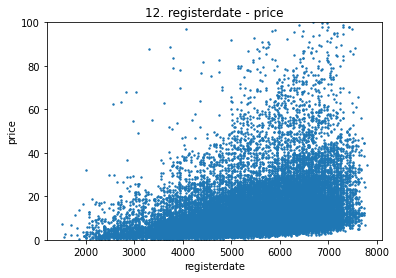

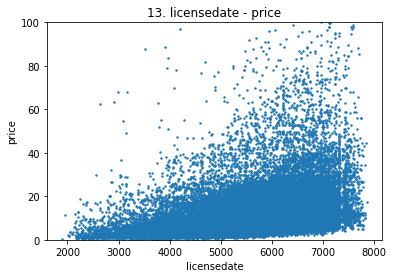

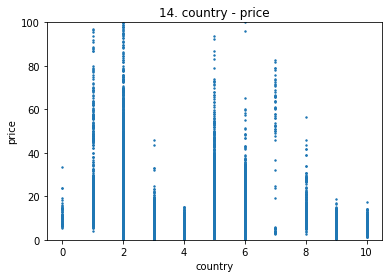

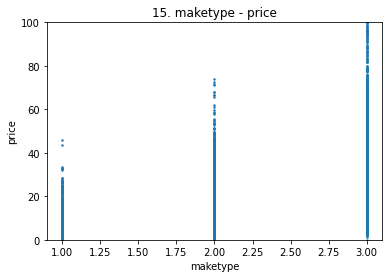

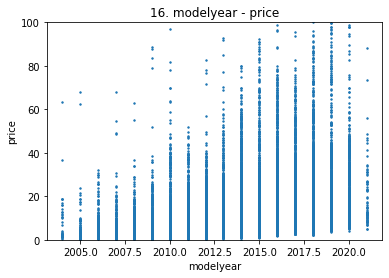

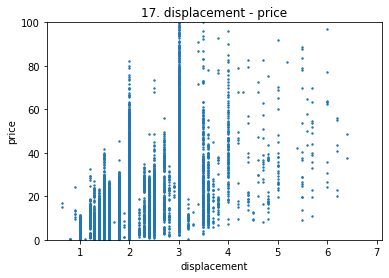

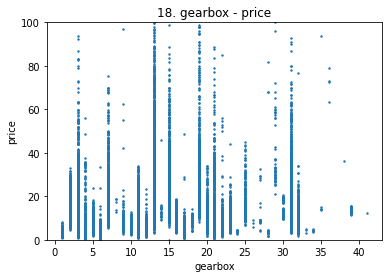

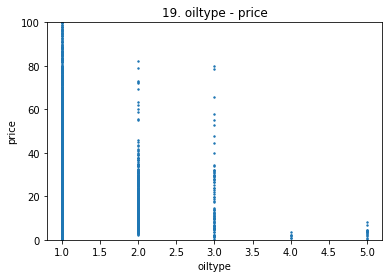

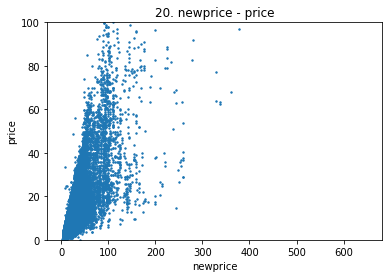

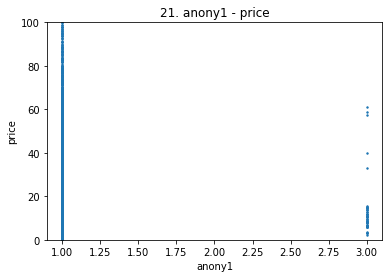

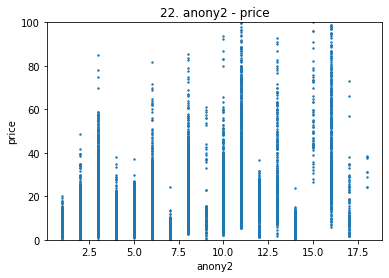

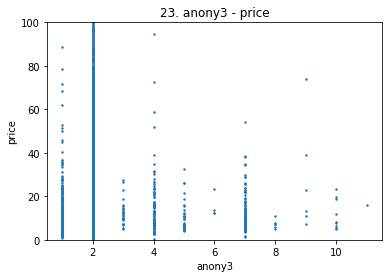

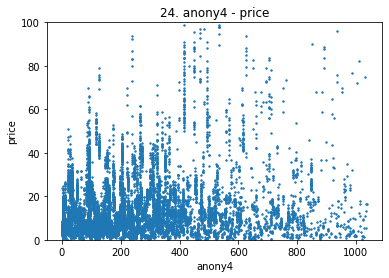

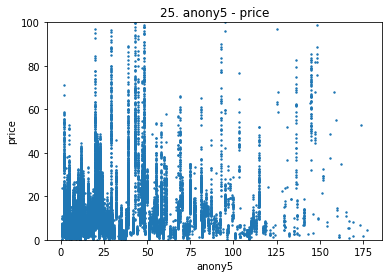

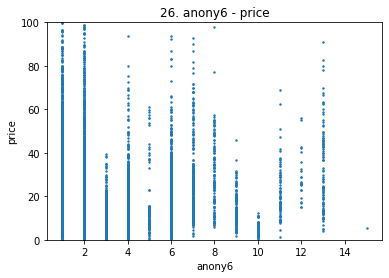

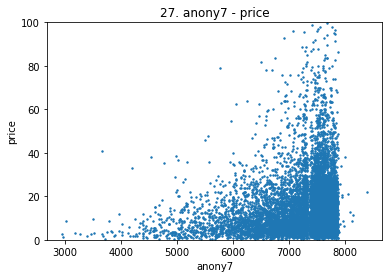

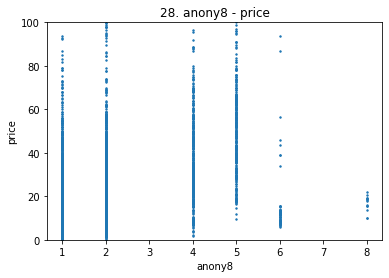

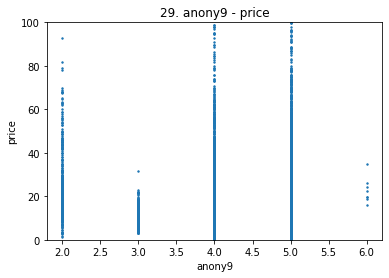

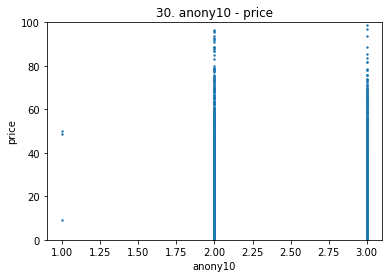

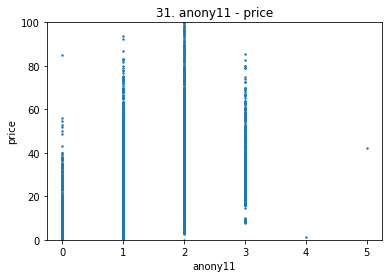

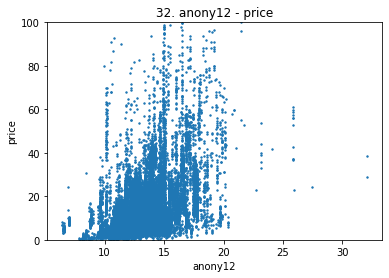

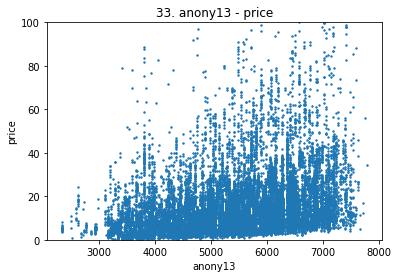

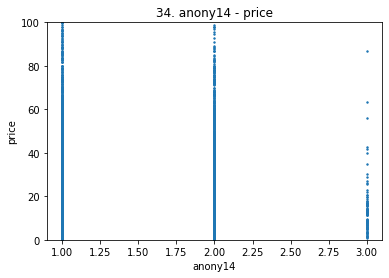

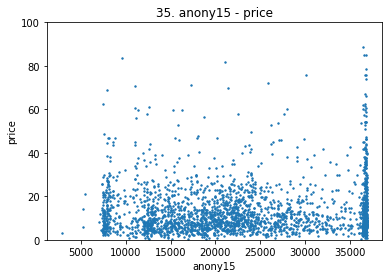

In [18]:
for i in range(35):
    plt.scatter(df[column[i]],df[column[-1]],s=2)
    plt.xlabel(column[i])
    plt.ylabel(column[-1])
    plt.ylim(0,100)
    plt.title(str(i+1) + '. ' + column[i]+' - '+column[-1])
    plt.show()

In [17]:
df.isnull().sum()

carid                0
tradetime            0
brand                0
serial               0
model                0
mileage              0
color                0
cityid               0
carcode              9
transfercount        0
seatings             0
registerdate         0
licensedate          0
country           3757
maketype          3641
modelyear          312
displacement         0
gearbox              1
oiltype              0
newprice             0
anony1            1582
anony2               0
anony3               0
anony4           12108
anony5               0
anony6               0
anony7           18044
anony8            3775
anony9            3744
anony10           6241
anony11            461
anony12              0
anony13           1619
anony14              0
anony15          27580
price                0
dtype: int64

# ----------------------------数据填充 -------------------------

# modelyear填充

In [18]:
df['modelyear'].isnull().sum()

312

C:\Users\kiko\AppData\Local\Temp/ipykernel_3728/2590049593.py:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(x) *3 + 2005


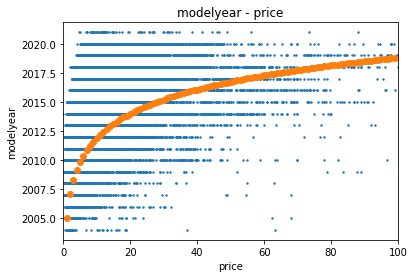

In [20]:
plt.scatter(df['price'],df['modelyear'],s=2)
plt.ylabel('modelyear')
plt.xlabel('price')
plt.xlim(0,100)
def modelyear_pred(x):
    y = np.log(x) *3 + 2005
    return y
x = range(0,100)
y = modelyear_pred(x)
plt.scatter(x,y)
plt.title(column[15]+' - '+column[-1])
plt.show()

In [22]:
null_list = []
def modelyear_pred(x):
    y = np.log(x) *3 + 2005
    return y
for i in range(len(df)):
    if df['modelyear'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))
price_list = []
for i in range(len(null_list)):
    price_list.append(df['price'][null_list[i]])
fill_list = []
for i in range(len(null_list)):
    fill_list.append(modelyear_pred(price_list[i]))
for i in range(len(null_list)):
    df['modelyear'][null_list[i]] = fill_list[i]

312


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/1723261181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modelyear'][null_list[i]] = fill_list[i]


In [23]:
df['modelyear'].isnull().sum()

0

In [24]:
fill_list

[2009.8162896731096,
 2010.1142442767152,
 2007.4194275976008,
 2011.3270010317642,
 2009.1588830833596,
 2013.1241506033066,
 2012.454719949364,
 2006.4100108877371,
 2015.0497122618237,
 2008.5817674054174,
 2014.2319367816392,
 2013.517235390526,
 2008.489452429417,
 2012.6010904418722,
 2012.9597258938215,
 2010.2108536981991,
 2012.912883210417,
 2017.5231618096868,
 2009.7058477537416,
 2014.7160353564932,
 2014.5216353768124,
 2006.4100108877371,
 2006.7633599947064,
 2011.5916737320088,
 2011.8440843696274,
 2016.2115799431774,
 2015.9363496885599,
 2010.8802843521419,
 2015.4895226843994,
 2015.0285854139477,
 2015.3000255049662,
 2012.528797787135,
 2004.6164998854704,
 2010.273573752657,
 2014.3802816078812,
 2011.084444741877,
 2013.2800298200987,
 2010.7945642348097,
 2010.837730447166,
 2011.1623712010867,
 2011.5581538302142,
 2011.0447090616267,
 2015.2015914780234,
 2014.7511234757826,
 2014.4038728172618,
 2014.7160353564932,
 2014.9425580140175,
 2008.563530267188,
 

# maketype填充 

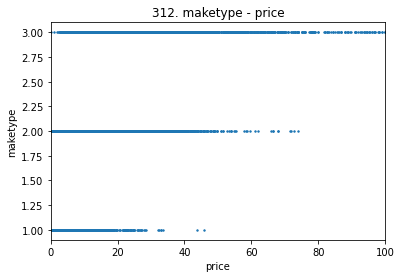

In [25]:
plt.scatter(df['price'],df['maketype'],s=2)
plt.ylabel('maketype')
plt.xlabel('price')
plt.xlim(0,100)
plt.title(str(i+1) + '. ' + 'maketype'+' - '+'price')
plt.show()

In [26]:
null_list = []
for i in range(30000):
    if df['maketype'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))
price_list = []
for i in range(len(null_list)):
    price_list.append(df['price'][null_list[i]])
fill_list = []
for i in range(len(null_list)):
    if price_list[i]<22:
        result = 1
    elif price_list[i]<70:
        result = 2
    else:
        result = 3
    fill_list.append(result)
for i in range(len(null_list)):
    df['maketype'][null_list[i]] = fill_list[i]
# print(fill_list)

3641


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/159813683.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maketype'][null_list[i]] = fill_list[i]


In [27]:
fill_list

[1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 1,


In [28]:
df['maketype'].isnull().sum()

0

# anony1填充

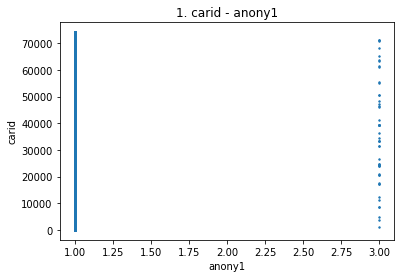

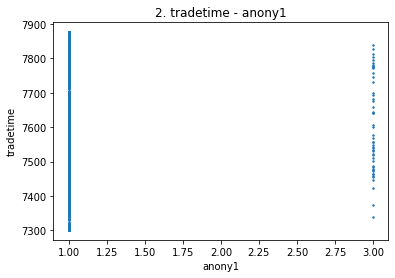

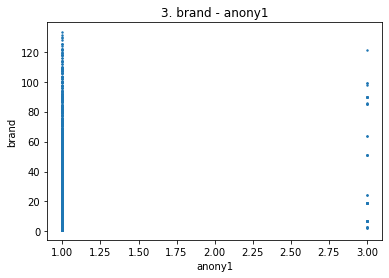

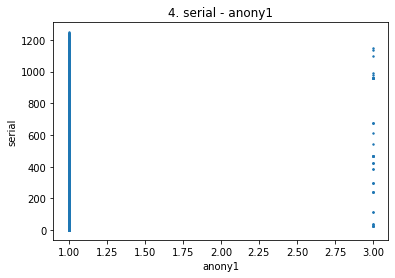

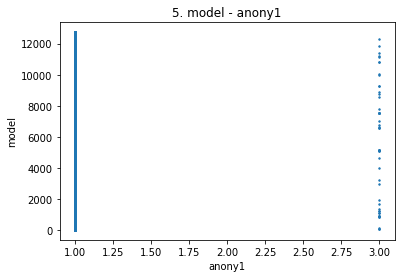

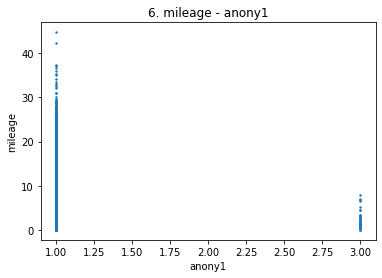

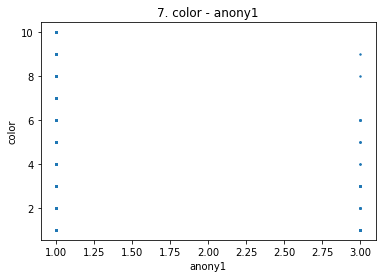

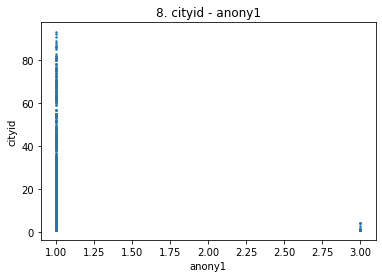

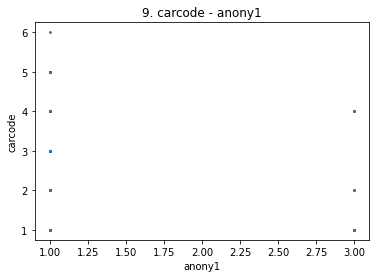

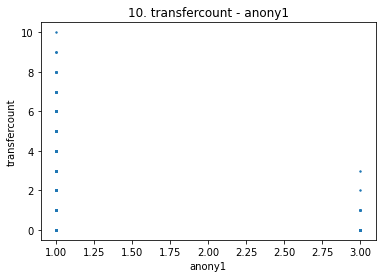

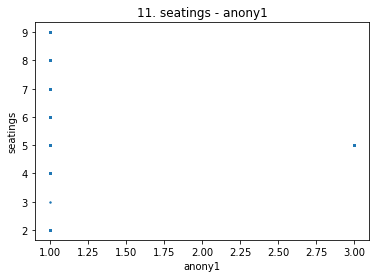

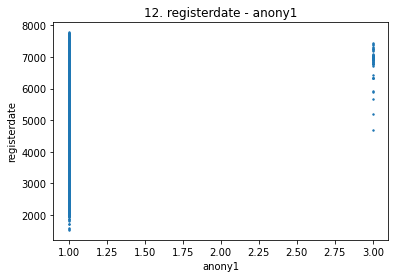

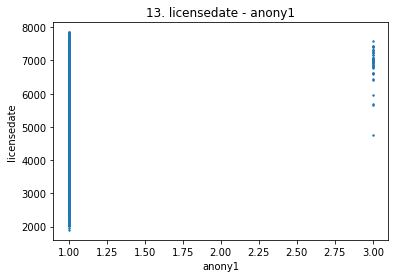

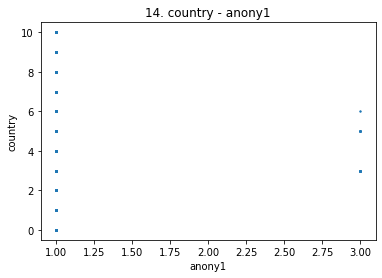

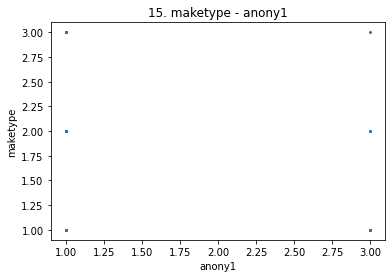

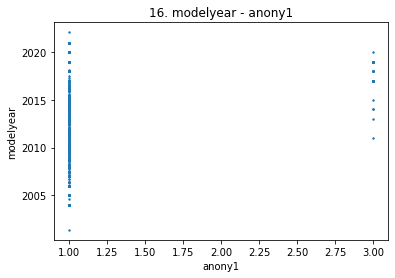

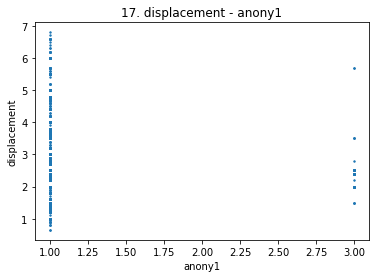

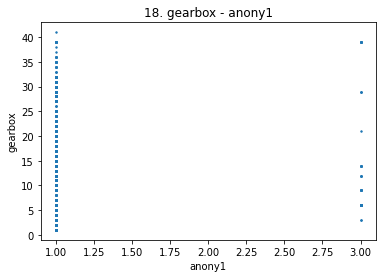

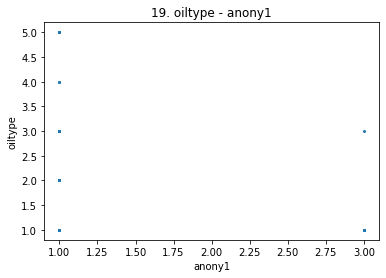

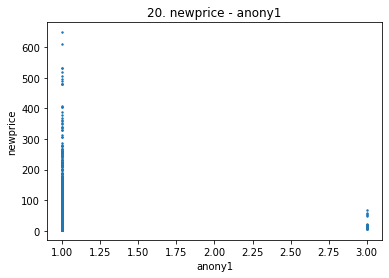

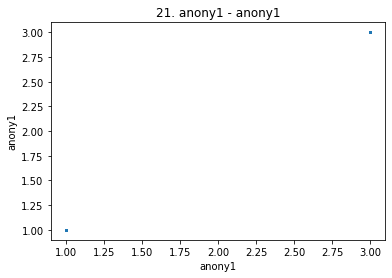

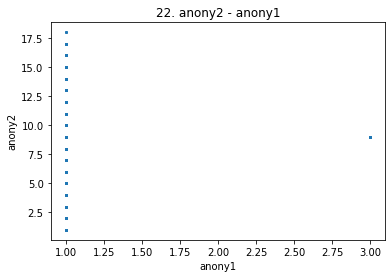

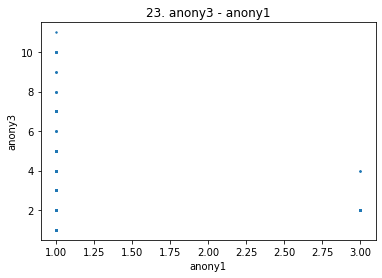

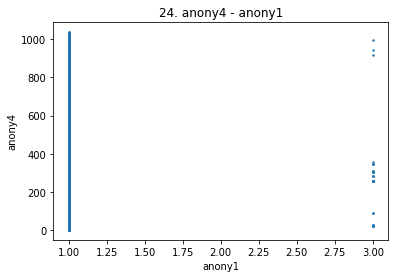

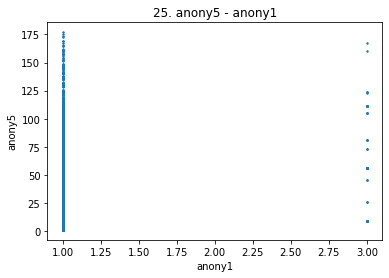

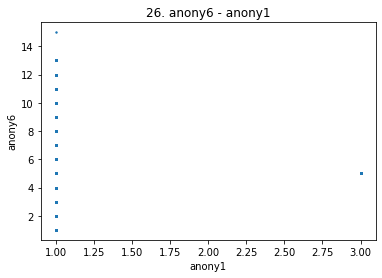

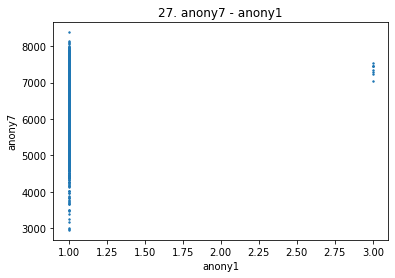

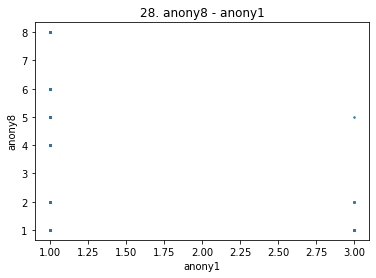

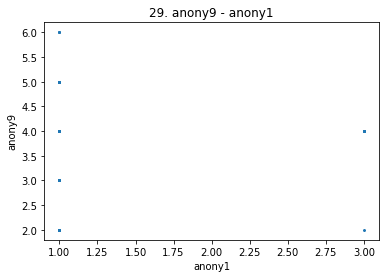

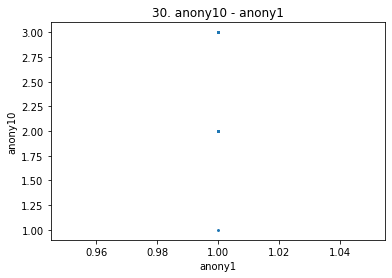

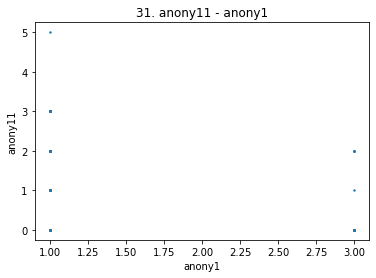

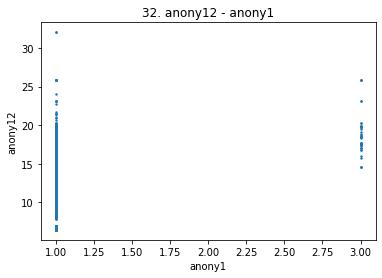

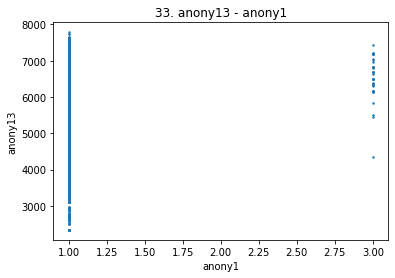

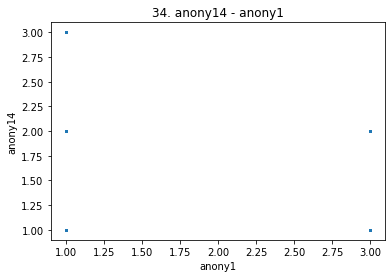

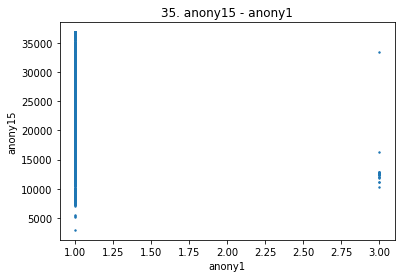

In [29]:
for i in range(35):
    plt.scatter(df[column[20]],df[column[i]],s=2)
    plt.ylabel(column[i])
    plt.xlabel(column[20])
    plt.title(str(i+1) + '. ' + column[i]+' - '+column[20])
    plt.show()

In [30]:
null_list = [] # nan数据的index
for i in range(30000):
    if df['anony1'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))
mileage_list = [] #nan数据对应的mileage
for i in range(len(null_list)):
    mileage_list.append(df['mileage'][null_list[i]])
print(len(mileage_list))  
cityid_list = [] #nan数据对应的mileage
for i in range(len(null_list)):
    cityid_list.append(df['cityid'][null_list[i]])
    
transfercount_list = [] #nan数据对应的mileage
for i in range(len(null_list)):
    transfercount_list.append(df['transfercount'][null_list[i]])
    

registerdate_list = [] #nan数据对应的mileage
for i in range(len(null_list)):
    registerdate_list.append(df['registerdate'][null_list[i]])

fill_list = []
for i in range(len(null_list)):
    if mileage_list[i]<9:
        if cityid_list[i]<10:
            if transfercount_list[i] <4:
                if registerdate_list[i] >5000:
                    param = 3
    else:
        param = 1
    fill_list.append(param)
for i in range(len(null_list)):
    df['anony1'][null_list[i]] = fill_list[i]

1582
1582


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/4240505816.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anony1'][null_list[i]] = fill_list[i]


In [31]:
fill_list

[3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,


# anony7数据填充

In [12]:
df1 =  pd.read_table("2021年MathorCup大数据竞赛赛道A/附件/附件1：估价训练数据.txt",header=None,names=column,index_col=False)
df1['anony7'] = df1['anony7'].apply(date2num)
df1['anony7']

SyntaxError: invalid syntax (<string>, line 1)

In [33]:
df1.drop(df[np.isnan(df['anony7'])].index, inplace=True) # 删除anony7的nan数据

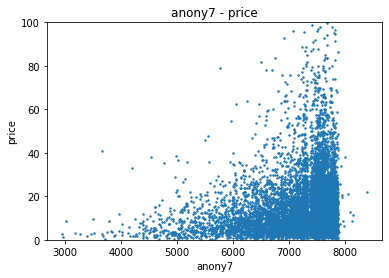

In [34]:
plt.scatter(df1[column[26]],df1[column[-1]],s=2)
plt.xlabel(column[26])
plt.ylabel(column[-1])
plt.ylim(0,100)
plt.title(column[26]+' - '+column[-1])
plt.show()

In [35]:
'''-------------------------------------对anony7数据进行回归--------------------------------------------'''

'-------------------------------------对anony7数据进行回归--------------------------------------------'

In [11]:
array = np.array(df1['anony7'])
x_data = torch.Tensor(array)
array = np.array(df1['price'])
y_data = torch.Tensor(array)

NameError: name 'df1' is not defined

In [37]:
x_data = x_data.reshape([11956,1])
y_data = y_data.reshape([11956,1])

epoch: 0 loss: tensor(572.0807, grad_fn=<MseLossBackward>)
epoch: 1 loss: tensor(571.8192, grad_fn=<MseLossBackward>)
epoch: 2 loss: tensor(571.6410, grad_fn=<MseLossBackward>)
epoch: 3 loss: tensor(571.4752, grad_fn=<MseLossBackward>)
epoch: 4 loss: tensor(571.3137, grad_fn=<MseLossBackward>)
epoch: 5 loss: tensor(571.1545, grad_fn=<MseLossBackward>)
epoch: 6 loss: tensor(570.9945, grad_fn=<MseLossBackward>)
epoch: 7 loss: tensor(570.8358, grad_fn=<MseLossBackward>)
epoch: 8 loss: tensor(570.6784, grad_fn=<MseLossBackward>)
epoch: 9 loss: tensor(570.5219, grad_fn=<MseLossBackward>)
epoch: 10 loss: tensor(570.3652, grad_fn=<MseLossBackward>)
epoch: 11 loss: tensor(570.2073, grad_fn=<MseLossBackward>)
epoch: 12 loss: tensor(570.0501, grad_fn=<MseLossBackward>)
epoch: 13 loss: tensor(569.8939, grad_fn=<MseLossBackward>)
epoch: 14 loss: tensor(569.7385, grad_fn=<MseLossBackward>)
epoch: 15 loss: tensor(569.5833, grad_fn=<MseLossBackward>)
epoch: 16 loss: tensor(569.4285, grad_fn=<MseLossB

epoch: 139 loss: tensor(551.3572, grad_fn=<MseLossBackward>)
epoch: 140 loss: tensor(551.2106, grad_fn=<MseLossBackward>)
epoch: 141 loss: tensor(551.0640, grad_fn=<MseLossBackward>)
epoch: 142 loss: tensor(550.9173, grad_fn=<MseLossBackward>)
epoch: 143 loss: tensor(550.7705, grad_fn=<MseLossBackward>)
epoch: 144 loss: tensor(550.6236, grad_fn=<MseLossBackward>)
epoch: 145 loss: tensor(550.4767, grad_fn=<MseLossBackward>)
epoch: 146 loss: tensor(550.3295, grad_fn=<MseLossBackward>)
epoch: 147 loss: tensor(550.1821, grad_fn=<MseLossBackward>)
epoch: 148 loss: tensor(550.0346, grad_fn=<MseLossBackward>)
epoch: 149 loss: tensor(549.8870, grad_fn=<MseLossBackward>)
epoch: 150 loss: tensor(549.7393, grad_fn=<MseLossBackward>)
epoch: 151 loss: tensor(549.5915, grad_fn=<MseLossBackward>)
epoch: 152 loss: tensor(549.4436, grad_fn=<MseLossBackward>)
epoch: 153 loss: tensor(549.2957, grad_fn=<MseLossBackward>)
epoch: 154 loss: tensor(549.1476, grad_fn=<MseLossBackward>)
epoch: 155 loss: tensor(

epoch: 278 loss: tensor(529.6896, grad_fn=<MseLossBackward>)
epoch: 279 loss: tensor(529.5195, grad_fn=<MseLossBackward>)
epoch: 280 loss: tensor(529.3492, grad_fn=<MseLossBackward>)
epoch: 281 loss: tensor(529.1786, grad_fn=<MseLossBackward>)
epoch: 282 loss: tensor(529.0079, grad_fn=<MseLossBackward>)
epoch: 283 loss: tensor(528.8367, grad_fn=<MseLossBackward>)
epoch: 284 loss: tensor(528.6652, grad_fn=<MseLossBackward>)
epoch: 285 loss: tensor(528.4935, grad_fn=<MseLossBackward>)
epoch: 286 loss: tensor(528.3217, grad_fn=<MseLossBackward>)
epoch: 287 loss: tensor(528.1495, grad_fn=<MseLossBackward>)
epoch: 288 loss: tensor(527.9769, grad_fn=<MseLossBackward>)
epoch: 289 loss: tensor(527.8041, grad_fn=<MseLossBackward>)
epoch: 290 loss: tensor(527.6311, grad_fn=<MseLossBackward>)
epoch: 291 loss: tensor(527.4577, grad_fn=<MseLossBackward>)
epoch: 292 loss: tensor(527.2841, grad_fn=<MseLossBackward>)
epoch: 293 loss: tensor(527.1102, grad_fn=<MseLossBackward>)
epoch: 294 loss: tensor(

epoch: 418 loss: tensor(502.7368, grad_fn=<MseLossBackward>)
epoch: 419 loss: tensor(502.5182, grad_fn=<MseLossBackward>)
epoch: 420 loss: tensor(502.2992, grad_fn=<MseLossBackward>)
epoch: 421 loss: tensor(502.0798, grad_fn=<MseLossBackward>)
epoch: 422 loss: tensor(501.8600, grad_fn=<MseLossBackward>)
epoch: 423 loss: tensor(501.6398, grad_fn=<MseLossBackward>)
epoch: 424 loss: tensor(501.4190, grad_fn=<MseLossBackward>)
epoch: 425 loss: tensor(501.1980, grad_fn=<MseLossBackward>)
epoch: 426 loss: tensor(500.9765, grad_fn=<MseLossBackward>)
epoch: 427 loss: tensor(500.7545, grad_fn=<MseLossBackward>)
epoch: 428 loss: tensor(500.5322, grad_fn=<MseLossBackward>)
epoch: 429 loss: tensor(500.3094, grad_fn=<MseLossBackward>)
epoch: 430 loss: tensor(500.0861, grad_fn=<MseLossBackward>)
epoch: 431 loss: tensor(499.8625, grad_fn=<MseLossBackward>)
epoch: 432 loss: tensor(499.6385, grad_fn=<MseLossBackward>)
epoch: 433 loss: tensor(499.4138, grad_fn=<MseLossBackward>)
epoch: 434 loss: tensor(

epoch: 561 loss: tensor(467.0455, grad_fn=<MseLossBackward>)
epoch: 562 loss: tensor(466.7637, grad_fn=<MseLossBackward>)
epoch: 563 loss: tensor(466.4812, grad_fn=<MseLossBackward>)
epoch: 564 loss: tensor(466.1984, grad_fn=<MseLossBackward>)
epoch: 565 loss: tensor(465.9150, grad_fn=<MseLossBackward>)
epoch: 566 loss: tensor(465.6314, grad_fn=<MseLossBackward>)
epoch: 567 loss: tensor(465.3474, grad_fn=<MseLossBackward>)
epoch: 568 loss: tensor(465.0628, grad_fn=<MseLossBackward>)
epoch: 569 loss: tensor(464.7776, grad_fn=<MseLossBackward>)
epoch: 570 loss: tensor(464.4917, grad_fn=<MseLossBackward>)
epoch: 571 loss: tensor(464.2047, grad_fn=<MseLossBackward>)
epoch: 572 loss: tensor(463.9169, grad_fn=<MseLossBackward>)
epoch: 573 loss: tensor(463.6290, grad_fn=<MseLossBackward>)
epoch: 574 loss: tensor(463.3408, grad_fn=<MseLossBackward>)
epoch: 575 loss: tensor(463.0522, grad_fn=<MseLossBackward>)
epoch: 576 loss: tensor(462.7628, grad_fn=<MseLossBackward>)
epoch: 577 loss: tensor(

epoch: 698 loss: tensor(424.5415, grad_fn=<MseLossBackward>)
epoch: 699 loss: tensor(424.2170, grad_fn=<MseLossBackward>)
epoch: 700 loss: tensor(423.8926, grad_fn=<MseLossBackward>)
epoch: 701 loss: tensor(423.5682, grad_fn=<MseLossBackward>)
epoch: 702 loss: tensor(423.2438, grad_fn=<MseLossBackward>)
epoch: 703 loss: tensor(422.9195, grad_fn=<MseLossBackward>)
epoch: 704 loss: tensor(422.5952, grad_fn=<MseLossBackward>)
epoch: 705 loss: tensor(422.2711, grad_fn=<MseLossBackward>)
epoch: 706 loss: tensor(421.9470, grad_fn=<MseLossBackward>)
epoch: 707 loss: tensor(421.6230, grad_fn=<MseLossBackward>)
epoch: 708 loss: tensor(421.2992, grad_fn=<MseLossBackward>)
epoch: 709 loss: tensor(420.9753, grad_fn=<MseLossBackward>)
epoch: 710 loss: tensor(420.6513, grad_fn=<MseLossBackward>)
epoch: 711 loss: tensor(420.3276, grad_fn=<MseLossBackward>)
epoch: 712 loss: tensor(420.0041, grad_fn=<MseLossBackward>)
epoch: 713 loss: tensor(419.6804, grad_fn=<MseLossBackward>)
epoch: 714 loss: tensor(

epoch: 843 loss: tensor(380.4483, grad_fn=<MseLossBackward>)
epoch: 844 loss: tensor(380.1828, grad_fn=<MseLossBackward>)
epoch: 845 loss: tensor(379.9187, grad_fn=<MseLossBackward>)
epoch: 846 loss: tensor(379.6537, grad_fn=<MseLossBackward>)
epoch: 847 loss: tensor(379.3903, grad_fn=<MseLossBackward>)
epoch: 848 loss: tensor(379.1285, grad_fn=<MseLossBackward>)
epoch: 849 loss: tensor(378.8658, grad_fn=<MseLossBackward>)
epoch: 850 loss: tensor(378.6046, grad_fn=<MseLossBackward>)
epoch: 851 loss: tensor(378.3452, grad_fn=<MseLossBackward>)
epoch: 852 loss: tensor(378.0846, grad_fn=<MseLossBackward>)
epoch: 853 loss: tensor(377.8261, grad_fn=<MseLossBackward>)
epoch: 854 loss: tensor(377.5683, grad_fn=<MseLossBackward>)
epoch: 855 loss: tensor(377.3106, grad_fn=<MseLossBackward>)
epoch: 856 loss: tensor(377.0541, grad_fn=<MseLossBackward>)
epoch: 857 loss: tensor(376.7988, grad_fn=<MseLossBackward>)
epoch: 858 loss: tensor(376.5442, grad_fn=<MseLossBackward>)
epoch: 859 loss: tensor(

epoch: 988 loss: tensor(350.6125, grad_fn=<MseLossBackward>)
epoch: 989 loss: tensor(350.4679, grad_fn=<MseLossBackward>)
epoch: 990 loss: tensor(350.3249, grad_fn=<MseLossBackward>)
epoch: 991 loss: tensor(350.1825, grad_fn=<MseLossBackward>)
epoch: 992 loss: tensor(350.0421, grad_fn=<MseLossBackward>)
epoch: 993 loss: tensor(349.9016, grad_fn=<MseLossBackward>)
epoch: 994 loss: tensor(349.7618, grad_fn=<MseLossBackward>)
epoch: 995 loss: tensor(349.6236, grad_fn=<MseLossBackward>)
epoch: 996 loss: tensor(349.4853, grad_fn=<MseLossBackward>)
epoch: 997 loss: tensor(349.3483, grad_fn=<MseLossBackward>)
epoch: 998 loss: tensor(349.2120, grad_fn=<MseLossBackward>)
epoch: 999 loss: tensor(349.0760, grad_fn=<MseLossBackward>)
epoch: 1000 loss: tensor(348.9414, grad_fn=<MseLossBackward>)
epoch: 1001 loss: tensor(348.8072, grad_fn=<MseLossBackward>)
epoch: 1002 loss: tensor(348.6740, grad_fn=<MseLossBackward>)
epoch: 1003 loss: tensor(348.5416, grad_fn=<MseLossBackward>)
epoch: 1004 loss: te

epoch: 1131 loss: tensor(337.0733, grad_fn=<MseLossBackward>)
epoch: 1132 loss: tensor(337.0188, grad_fn=<MseLossBackward>)
epoch: 1133 loss: tensor(336.9650, grad_fn=<MseLossBackward>)
epoch: 1134 loss: tensor(336.9114, grad_fn=<MseLossBackward>)
epoch: 1135 loss: tensor(336.8582, grad_fn=<MseLossBackward>)
epoch: 1136 loss: tensor(336.8058, grad_fn=<MseLossBackward>)
epoch: 1137 loss: tensor(336.7531, grad_fn=<MseLossBackward>)
epoch: 1138 loss: tensor(336.7011, grad_fn=<MseLossBackward>)
epoch: 1139 loss: tensor(336.6496, grad_fn=<MseLossBackward>)
epoch: 1140 loss: tensor(336.5986, grad_fn=<MseLossBackward>)
epoch: 1141 loss: tensor(336.5481, grad_fn=<MseLossBackward>)
epoch: 1142 loss: tensor(336.4980, grad_fn=<MseLossBackward>)
epoch: 1143 loss: tensor(336.4479, grad_fn=<MseLossBackward>)
epoch: 1144 loss: tensor(336.3986, grad_fn=<MseLossBackward>)
epoch: 1145 loss: tensor(336.3498, grad_fn=<MseLossBackward>)
epoch: 1146 loss: tensor(336.3007, grad_fn=<MseLossBackward>)
epoch: 1

epoch: 1275 loss: tensor(332.4680, grad_fn=<MseLossBackward>)
epoch: 1276 loss: tensor(332.4508, grad_fn=<MseLossBackward>)
epoch: 1277 loss: tensor(332.4346, grad_fn=<MseLossBackward>)
epoch: 1278 loss: tensor(332.4182, grad_fn=<MseLossBackward>)
epoch: 1279 loss: tensor(332.4029, grad_fn=<MseLossBackward>)
epoch: 1280 loss: tensor(332.3875, grad_fn=<MseLossBackward>)
epoch: 1281 loss: tensor(332.3715, grad_fn=<MseLossBackward>)
epoch: 1282 loss: tensor(332.3554, grad_fn=<MseLossBackward>)
epoch: 1283 loss: tensor(332.3415, grad_fn=<MseLossBackward>)
epoch: 1284 loss: tensor(332.3269, grad_fn=<MseLossBackward>)
epoch: 1285 loss: tensor(332.3128, grad_fn=<MseLossBackward>)
epoch: 1286 loss: tensor(332.2974, grad_fn=<MseLossBackward>)
epoch: 1287 loss: tensor(332.2819, grad_fn=<MseLossBackward>)
epoch: 1288 loss: tensor(332.2682, grad_fn=<MseLossBackward>)
epoch: 1289 loss: tensor(332.2543, grad_fn=<MseLossBackward>)
epoch: 1290 loss: tensor(332.2405, grad_fn=<MseLossBackward>)
epoch: 1

epoch: 1418 loss: tensor(331.2055, grad_fn=<MseLossBackward>)
epoch: 1419 loss: tensor(331.2024, grad_fn=<MseLossBackward>)
epoch: 1420 loss: tensor(331.1957, grad_fn=<MseLossBackward>)
epoch: 1421 loss: tensor(331.1911, grad_fn=<MseLossBackward>)
epoch: 1422 loss: tensor(331.1871, grad_fn=<MseLossBackward>)
epoch: 1423 loss: tensor(331.1829, grad_fn=<MseLossBackward>)
epoch: 1424 loss: tensor(331.1790, grad_fn=<MseLossBackward>)
epoch: 1425 loss: tensor(331.1750, grad_fn=<MseLossBackward>)
epoch: 1426 loss: tensor(331.1711, grad_fn=<MseLossBackward>)
epoch: 1427 loss: tensor(331.1672, grad_fn=<MseLossBackward>)
epoch: 1428 loss: tensor(331.1632, grad_fn=<MseLossBackward>)
epoch: 1429 loss: tensor(331.1592, grad_fn=<MseLossBackward>)
epoch: 1430 loss: tensor(331.1560, grad_fn=<MseLossBackward>)
epoch: 1431 loss: tensor(331.1519, grad_fn=<MseLossBackward>)
epoch: 1432 loss: tensor(331.1479, grad_fn=<MseLossBackward>)
epoch: 1433 loss: tensor(331.1472, grad_fn=<MseLossBackward>)
epoch: 1

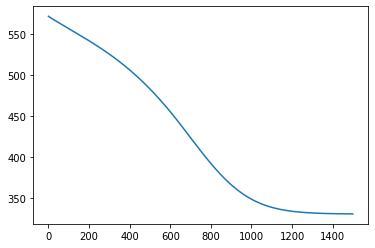

In [38]:
import torch
from torch.nn import Module
class anony7_model(Module):
    def __init__(self):
        para = [1, 20, 20, 20, 1]
        super(anony7_model, self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.linear1 = torch.nn.Linear(para[0], para[1],bias=True)
        self.linear2 = torch.nn.Linear(para[1], para[2],bias=True)
        self.linear3 = torch.nn.Linear(para[2], para[3],bias=True)
        self.linear4 = torch.nn.Linear(para[3], para[4],bias=True)
        self.bn1 = torch.nn.BatchNorm1d(para[1])
        self.bn2 = torch.nn.BatchNorm1d(para[2])
        self.bn3 = torch.nn.BatchNorm1d(para[3])
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.bn1(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.bn2(x)  
        x = self.linear3(x)
        x = self.relu(x)
        x = self.bn3(x)  
        y = self.linear4(x)
        return y

Model = anony7_model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(Model.parameters(),lr=0.0001)
loss_list = []
epochs = range(0,1500)
for epoch in range(1500):
    y_pred = Model(x_data)
    loss = criterion(y_pred, y_data)
    loss_list.append(loss)
    print('epoch:',epoch, 'loss:',loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.plot(epochs,loss_list)

In [39]:
y_pred = Model(x_data)

In [40]:
x_data = x_data.detach().numpy()
y_pred = y_pred.detach().numpy()

In [41]:
x_data = x_data.reshape(11956)
y_pred = y_pred.reshape(11956)

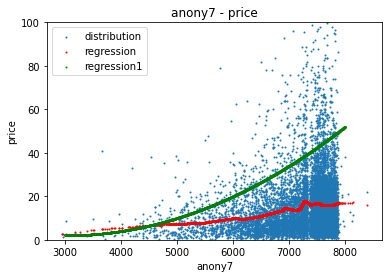

In [42]:
plt.scatter(df1[column[26]],df1[column[-1]],s=1, label = 'distribution')
plt.scatter(x_data,y_pred,s=1, c='r', label = 'regression')
aaa = np.linspace(3000,8000,5000)
A = 0.000002
bbb = (aaa**2) * A - 6000 * A * aaa + 20
plt.scatter(aaa,bbb,c = 'g',s=1,label = 'regression1')

ax = plt.subplot(111)
plt.xlabel(column[26])
plt.ylabel(column[-1])
plt.ylim(0,100)
plt.title(column[26]+' - '+column[-1])
ax.legend(fontsize=10)
plt.show()

In [21]:
plt.scatter(df1[column[-1]],df1[column[26]],s=1, label = 'distribution')
plt.scatter(y_pred,x_data,s=1, c='r', label = 'regression')
aaa = np.linspace(0,100,100)
def func(aaa):
    A = 0.2
    B = -200 * A
    C = A + 5700
    bbb = -(aaa**2) * A - B * aaa + C
    return bbb
bbb = func(aaa)
plt.scatter(aaa,bbb,c = 'g',s=1,label = 'regression1')
plt.xlim(0,100)
ax = plt.subplot(111)
ax.legend(fontsize=10)

NameError: name 'df1' is not defined

In [44]:
# 读取anony7中nan数据的index，找到该index对应的price，并寻找在已有price列表中最接近的price值的索引，得到该索引对应的预测的anony7时间值
def func(aaa):
    A = 0.2
    B = -200 * A
    C = A + 5700
    bbb = -(aaa**2) * A - B * aaa + C
    return bbb
null_list = []
for i in range(30000):
    if df['anony7'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))
price_list = []
for i in range(len(null_list)):
    price_list.append(df['price'][null_list[i]])
fill_list = []
for i in range(len(null_list)):
    fill_list.append(func(price_list[i]))
for i in range(len(null_list)):
    df['anony7'][null_list[i]] = fill_list[i]

18044


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/3088003835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anony7'][null_list[i]] = fill_list[i]


In [45]:
fill_list
max(fill_list)

7700.199979999999

In [46]:
df['anony7'].isnull().sum()

0

# anony4填充

In [47]:
# 未发现anony4与各项的直接关系 对nan数据填充均值
null_list = []
for i in range(30000):
    if df['anony4'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))

for i in range(len(null_list)):
    df['anony4'][null_list[i]] = 600

12108


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/3494036195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anony4'][null_list[i]] = 600


In [48]:
df['anony4'].isnull().sum()

0

# anony13填充

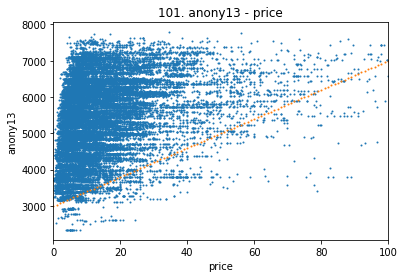

In [49]:
plt.scatter(df[column[-1]],df[column[32]],s=1)
x = range(0,101)
y = []
for i in range(101):
    y.append(40*i+3000)
plt.scatter(x,y,s=1)
plt.ylabel(column[32])
plt.xlabel(column[-1])
plt.xlim(0,100)
plt.title(str(i+1) + '. ' + column[32]+' - '+column[-1])
plt.show()

In [50]:
null_list = []
def funcc(i):
    y = 40*i+3000
    return y
for i in range(30000):
    if df['anony13'].isnull()[i] == True:
        null_list.append(i)
print(len(null_list))
price_list = []
for i in range(len(null_list)):
    price_list.append(df['price'][null_list[i]])
fill_list = []
for i in range(len(null_list)):
    fill_list.append(funcc(price_list[i]))
for i in range(len(null_list)):
    df['anony13'][null_list[i]] = fill_list[i]

1619


C:\Users\kiko\AppData\Local\Temp/ipykernel_3896/2490535465.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anony13'][null_list[i]] = fill_list[i]


In [51]:
fill_list

[3040.0,
 3059.6,
 3047.2,
 3120.0,
 3128.0,
 3060.0,
 3119.6,
 3040.0,
 11400.0,
 3119.6,
 3215.6,
 3208.0,
 3084.0,
 3147.2,
 3096.0,
 3006.0,
 3200.0,
 3155.2,
 3048.0,
 3032.0,
 3132.0,
 3093.6,
 3050.0,
 3075.2,
 3036.0,
 3476.0,
 3018.0,
 3107.2,
 3216.0,
 3128.0,
 3117.6,
 3106.4,
 3049.6,
 3160.0,
 3256.0,
 3108.4,
 3304.0,
 3060.0,
 3111.2,
 3055.6,
 3116.0,
 3052.0,
 3040.0,
 3012.0,
 3093.6,
 3060.0,
 3031.996,
 3104.0,
 3078.0,
 3112.0,
 3132.0,
 3051.2,
 3060.0,
 3102.0,
 3291.2,
 3292.0,
 3043.2,
 3124.0,
 3907.2,
 3752.0,
 3132.0,
 3104.0,
 3520.0,
 3088.0,
 3239.2,
 3068.0,
 3048.0,
 3116.0,
 3276.0,
 3171.2,
 3132.0,
 3131.2,
 3840.0,
 3355.2,
 3267.2,
 3048.0,
 3216.0,
 3036.0,
 3100.0,
 3088.0,
 3120.0,
 3227.2,
 3024.0,
 3027.2,
 3036.0,
 3110.0,
 3212.0,
 3392.0,
 3327.2,
 3400.0,
 3051.2,
 3191.2,
 3060.0,
 3728.0,
 3099.2,
 3174.0,
 3036.0,
 3048.0,
 3107.2,
 3240.0,
 3140.0,
 3148.0,
 3147.2,
 3175.2,
 3184.0,
 3199.2,
 3235.2,
 3227.2,
 3180.0,
 3232.0,
 3248.0

In [52]:
df['anony13'].isnull().sum()

0

# 少量nan数据删除 carcode共9条，gearbox共1条

In [53]:
# 针对gearbox和carcode 仅10条数据存在nan数据，直接删除
df.drop(df[np.isnan(df['gearbox'])].index, inplace=True)
df.drop(df[np.isnan(df['carcode'])].index, inplace=True)
# 针对anony15 删除该列，不作为变量
del df['anony15']

# country anony8-11为分类项 nan值对one-hot码置全0，anony15列删除

In [54]:
nan_data = df.isnull().sum()
print(nan_data)

carid               0
tradetime           0
brand               0
serial              0
model               0
mileage             0
color               0
cityid              0
carcode             0
transfercount       0
seatings            0
registerdate        0
licensedate         0
country          3755
maketype            0
modelyear           0
displacement        0
gearbox             0
oiltype             0
newprice            0
anony1              0
anony2              0
anony3              0
anony4              0
anony5              0
anony6              0
anony7              0
anony8           3769
anony9           3742
anony10          6237
anony11           461
anony12             0
anony13             0
anony14             0
price               0
dtype: int64


# 导出Excel

In [55]:
writer = pd.ExcelWriter('初洗数据集.xlsx')
df.to_excel(writer)
writer.save()

# ————————————————————————————————

# 异常值处理

In [56]:
# 删除anony10中值为1的数据 7360 17297 19630
# 删除anony6中值为15的数据 8624
# 删除价格大于100的数据
df = df.drop([7360, 17297, 19630,19774,24837,8624,22314,20181,14708,21681,26556,1786,22113,20436,27592,9900,17008,9087,15432,2647,23477,9235,16785,20077,22106,6994,19805,12847,20559,25994,16911,22317,4536,1156,13985,28105,14340,15886,17146,12493,13782,9286,21429,28297,345,27519,23323,7409,20601,13615,14329,28570,17934,3487,15574,25048,18257,12835,22648,14564,29300,25670,13290,15495,14471,3444,18779,1381,5923,14343,24302,7157,21287,28273,21765,22595,22289,5466,17089,5153,19319,18040,3551,25619,10158,17634,64,15115,27554,22858,25005,13960,17605,3281,18319,11004,16330,25862,26304,13798,26801,27461,7793,3106,22115])
# 删除carcode=6的两条数据
df = df.drop([3265, 19539])
# 删除transforcount>6数据
df = df.drop([29620,5690,14925,24530,6818,29828,3236,11659,16426,19191,28881,647,4412,7290,20089,1041,8803,11660,21065,21587,21872])
# 删除seatings=3数据
df = df.drop([29227])

# 数据分析与可视化：各属性与价格的关系

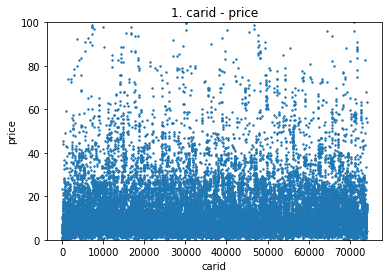

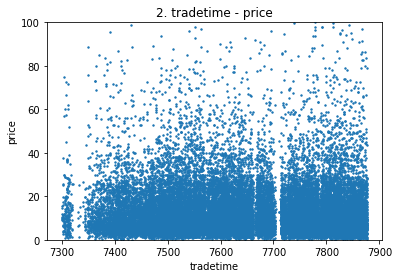

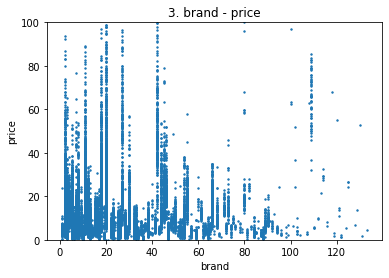

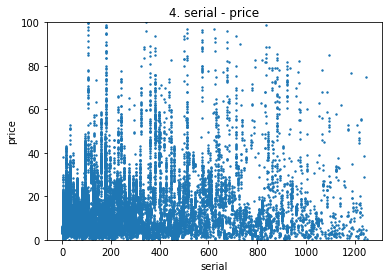

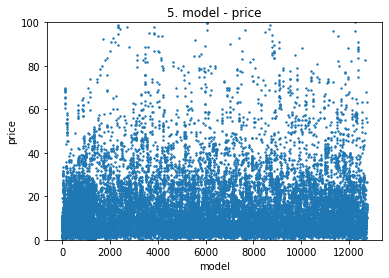

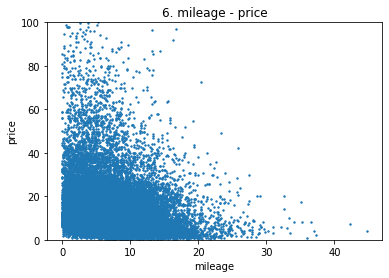

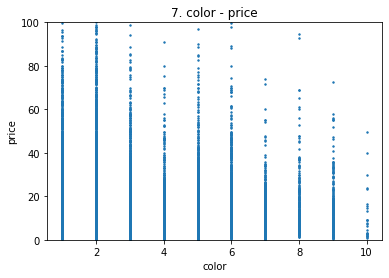

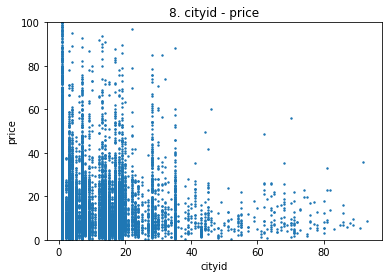

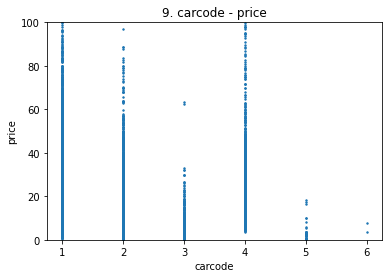

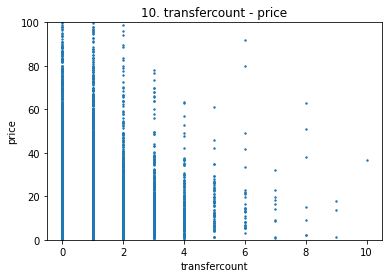

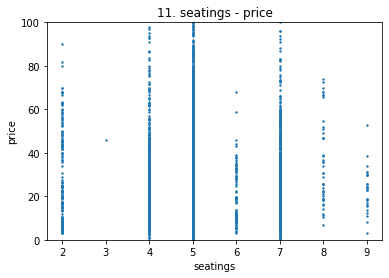

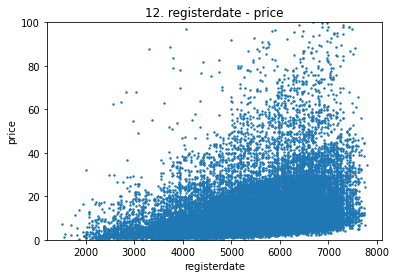

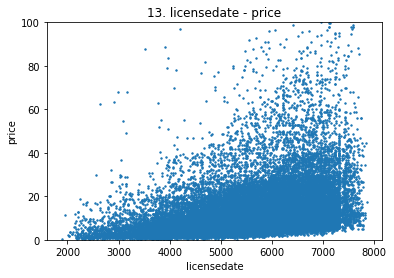

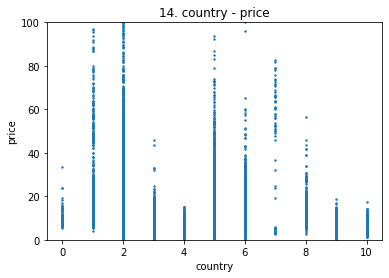

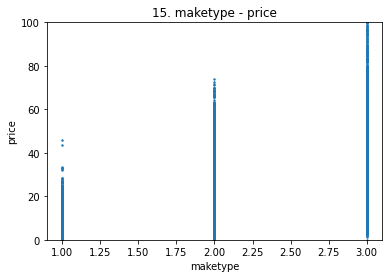

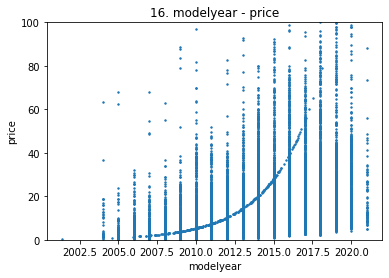

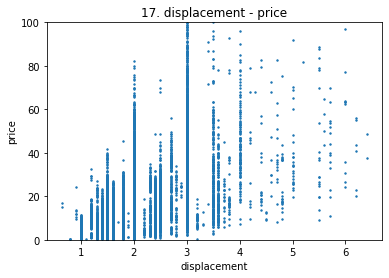

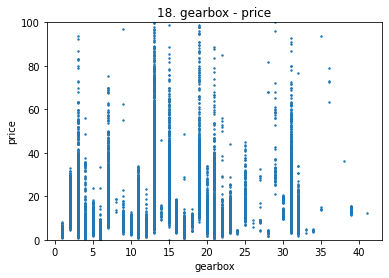

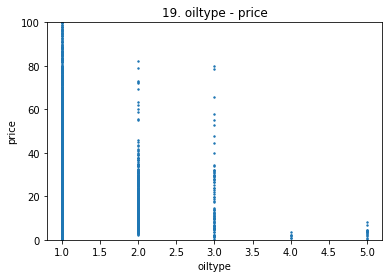

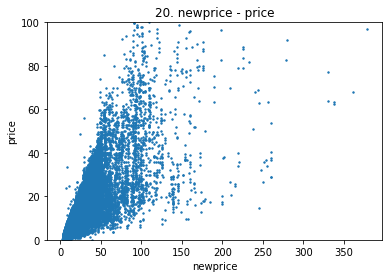

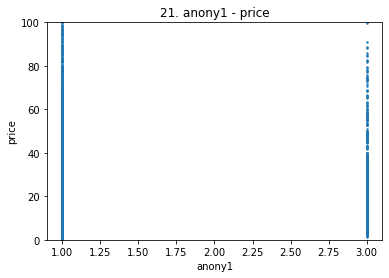

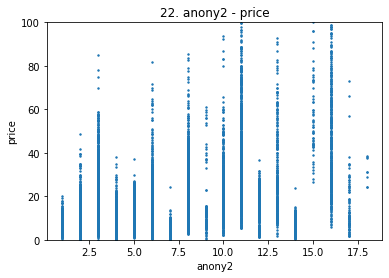

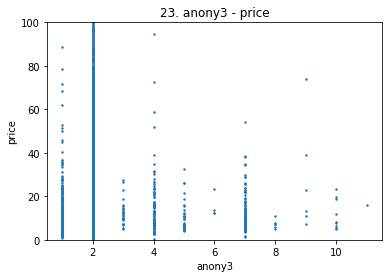

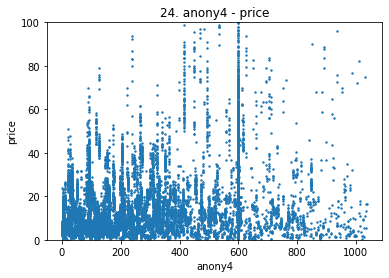

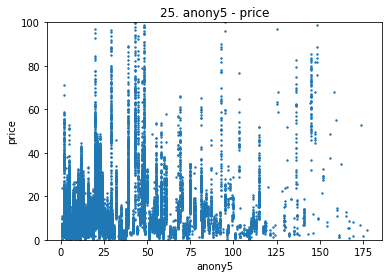

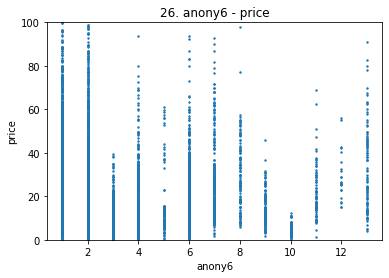

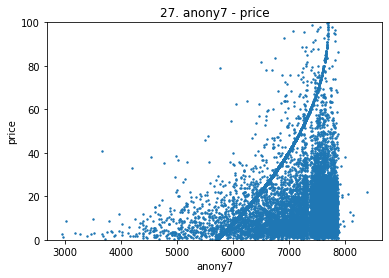

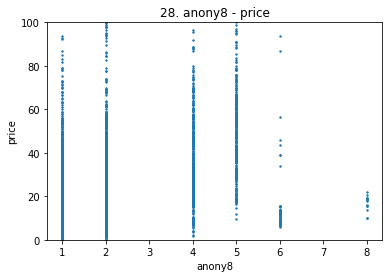

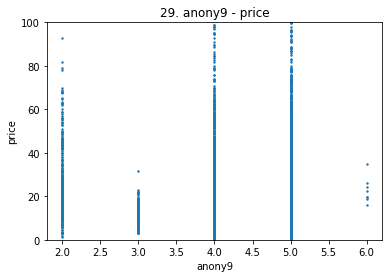

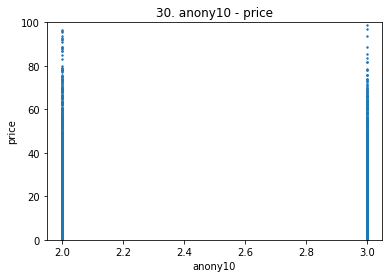

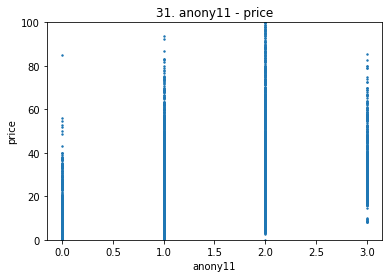

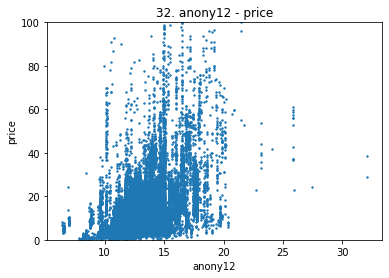

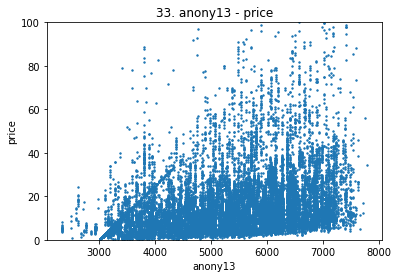

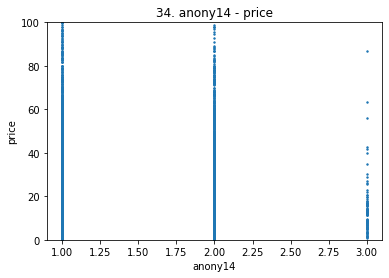

In [57]:
# plt.figure(figsize=(16,16))
# for i in range(21):
#     plt.subplot(10,10,i+1)
#     plt.scatter(df[column[i]],df[column[-1]],s=2)
#     plt.xlabel(column[i])
#     plt.ylabel(column[-1])
#     plt.title(column[i]+' - '+column[-1])
for i in range(34):
    plt.scatter(df[column[i]],df[column[-1]],s=2)
    plt.xlabel(column[i])
    plt.ylabel(column[-1])
    plt.ylim(0,100)
    plt.title(str(i+1) + '. ' + column[i]+' - '+column[-1])
    plt.show()

In [61]:
len(df)

29885

In [62]:
writer = pd.ExcelWriter('次洗数据集.xlsx')
df.to_excel(writer)
writer.save()

# 数据相关性

In [59]:
# 数据分析
print(column)
print('连续变量：carid, tradetime, serial, model, mileage, registerdate, licensedate, modelyear, displacement, gearbox, newprice, anony2, anony4,5,7,12,13,15')
print('离散变量：brand, color, cityid, carcode, transfercount, seatings, country, maketype, oiltype, anony1, anony3,6,8,9,10,11,14')

['carid', 'tradetime', 'brand', 'serial', 'model', 'mileage', 'color', 'cityid', 'carcode', 'transfercount', 'seatings', 'registerdate', 'licensedate', 'country', 'maketype', 'modelyear', 'displacement', 'gearbox', 'oiltype', 'newprice', 'anony1', 'anony2', 'anony3', 'anony4', 'anony5', 'anony6', 'anony7', 'anony8', 'anony9', 'anony10', 'anony11', 'anony12', 'anony13', 'anony14', 'anony15', 'price']
连续变量：carid, tradetime, serial, model, mileage, registerdate, licensedate, modelyear, displacement, gearbox, newprice, anony2, anony4,5,7,12,13,15
离散变量：brand, color, cityid, carcode, transfercount, seatings, country, maketype, oiltype, anony1, anony3,6,8,9,10,11,14


In [60]:
# 计算相关系数
